## Roomba simulation

* Room that is 15 x 20 ft.
each"tick' (unit of time) the roomba moves 1 foot untuill it hits a wall. Whatever spot(1 ft x 1 ft square) the roomba is in at the  time considered cleanred.
* The roomba does not keep track of where its been the only thing is ithe number of degress it las turned.
* Oure defalut foomba follows these rules:
1. move in a straight line until it hits a wall
2. Rotate randomly from 90 to 270 degrees


In [68]:
import math
import random
import matplotlib.pyplot as plt
import statistics as st

In [69]:
%matplotlib inline

In [70]:
def angle_to_x_y(degrees, dist=1):
    radians = math.radians(degrees)
    x = dist * math.cos(radians)
    y = dist * math.sin(radians)
    return x, y

In [71]:
angle_to_x_y(45, 1)

(0.7071067811865476, 0.7071067811865475)

In [72]:
math.sqrt(2)/2     # note this is equivalent to math.cos(math.radians(45))

0.7071067811865476

In [73]:
class Room:
    """
    Responsibilities:
    -Dimiensions (width * height)
    keep track of how much of the room hsas been cleaned
    """
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.clean_squares = set()
        
    def reset(self):
        self.clean_squares = set()
        
    def pick_random_location(self):
        x = random.uniform(0, self.width)
        y = random.uniform(0, self.height)
        return x, y
    
    def how_much_cleaned(self):
        return len(self.clean_squares) / self.total_squares()  # (self.width * self.height)
    
    def total_squares(self):
        return self.width * self.height
    
    def in_room(self, x, y):
        if 0 < x < self.width and 0 < y < self.height:
            return True       # now it is in the room
        else:
            return False
        
    def clean_square(self, x, y):
        x = int(x)
        y = int(y)
        self.clean_squares.add((x, y))
    

In [74]:
bedroom = Room(4, 3)
print(bedroom.how_much_cleaned())
bedroom.clean_square(1.8, 0.9)
print(bedroom.how_much_cleaned())
bedroom.clean_square(2.0, 1.5)
print(bedroom.how_much_cleaned())
bedroom.clean_square(2.6, 0.9)
print(bedroom.how_much_cleaned())
bedroom.clean_square(4.0, 3.0)
print(bedroom.how_much_cleaned())
bedroom.clean_square(12.0, 1.0)
print(bedroom.how_much_cleaned())


0.0
0.08333333333333333
0.16666666666666666
0.25
0.3333333333333333
0.4166666666666667


In [75]:
class Roomba:
    """
    Responsibilities:
    - know it currentangle
    - have a response for hitting a wall
    - report its relative x and y movement
    - know its speed
    - change its angle
    """
    
    def __init__(self, speed=1, angle=0):
        self.angle = angle
        self.speed = speed
        
    def move(self):
        return angle_to_x_y(self.angle, self.speed)
    
    def turn(self, turn_amount):
        self.angle += turn_amount
        self.angle %= 360
        
    def hit_wall(self):
        self.turn(random.uniform(90, 270))
        
class SmartRoomba(Roomba):
    def __init__(self, speed=1, angle=0):
        super().__init__(speed, angle)

    def hit_wall(self):
        self.turn(random.uniform(160, 220))
        

In [76]:
class Simulation:
    """
    Responsibilities:
    - place the Roomba
    - figure out where ther Roomba is moving (by asking it)
    - updating the room
    - iterating over ticks
    - keeping track of some stats as the room is cleaned
    
    Collaborators:
    - Roomba
    - Room
    """
    
    def __init__(self, room, roomba):
        self.room = room
        self.roomba = roomba
        self.reset()
        
    def reset(self):
        self.ticks = 0
        
        initial_x, initial_y = self.room.pick_random_location()
        initial_angle = random.uniform(0, 360)
        
        self.current_x = initial_x
        self.current_y = initial_y
        self.current_angle = initial_angle
        
    def update_roomba(self):
        change_x, change_y = self.roomba.move()
        
        #check to see if we've hit the wall
        #if so, let the roomba know and get new values
        
        new_x = self.current_x + change_x
        new_y = self.current_y + change_y
        
        if self.room.in_room(new_x, new_y):
            # the roomba moves!
            self.current_x = new_x
            self.current_y = new_y
        else:
            self.roomba.hit_wall()
            
    def iterate(self):
        self.ticks += 1
        self.update_roomba()
        self.room.clean_square(self.current_x, self.current_y)
        
    def get_stats(self):
        return {
            'ticks': self.ticks,
            'ratio_cleaned' : self.room.how_much_cleaned(),
            'roomba_location': (self.current_x, self.current_y),
            'roomba_angle': self.roomba.angle
        }
        
    def run_simulation(self):
        stats = []
        self.reset()
        self.room.clean_square(self.current_x, self.current_y)
        while self.room.how_much_cleaned() < 1.0:
            stats.append(self.get_stats())
            self.iterate()
            
        stats.append(self.get_stats())
        return stats
        
#         print("ROOM CLEAN!!!")
#         print(self.get_stats())
        
        

In [77]:
sally = Roomba()
# amanda = SmartRoomba()
bedroom = Room(10, 15)
# bedroom2 = Room(15, 10)

sim1 = Simulation(bedroom, sally)
# sim2 = Simulation(bedroom1, amanda)
# sim3 = Simulation(bedroom2, sally)
# sim4 = Simulation(bedroom2, amanda)

# print("Sim1(bed1, Sally): {}".format(len(sim1.run_simulation())))
# sim1 = Simulation(bedroom, sally)
# print("Sim1(bed1, Sally): {}".format(len(sim1.run_simulation())))
# sim1 = Simulation(bedroom, sally)
# print("Sim1(bed1, Sally): {}".format(len(sim1.run_simulation())))
# print("Sim2(bed1, Amanda): {}".format(len(sim2.run_simulation())))
# print("Sim3(bed2, Sally): {}".format(len(sim3.run_simulation())))
# print("Sim4(bed2, Amanda): {}".format(len(sim4.run_simulation())))
'''
The reset does not seem to work since can't run to print the results and then plot the results.  
'''

"\nThe reset does not seem to work since can't run to print the results and then plot the results.  \n"

1392


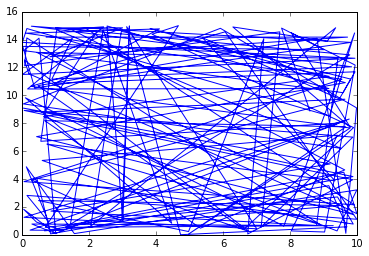

In [78]:
results = sim1.run_simulation()

x_values = [
    stat['roomba_location'][0]
    for stat in results
]

y_values = [
    stat['roomba_location'][1]
    for stat in results
]

print(len(x_values))
# print(len(sim1.run_simulation()))

plt.plot(x_values, y_values)
plt.show()